**This Project is done by:   
**

Uncomment this cell to install required packages

In [1]:
#!pip install --user imblearn

# Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./Dataset-vf.csv')

display(df.head())

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
0,2709,59.0,11,120,43,150,228,217,120,2114,0.66,269,FC11,CA49,R1,Melon
1,2802,54.0,7,0,0,693,224,225,136,162,0.35,195,FC11,CA50,NaN,Melon
2,2325,28.0,12,0,0,1260,215,213,133,162,0.89,750,FC14,CA26,NaN,Carrot
3,2837,112.0,8,272,16,3649,235,231,128,6221,0.27,-155,FC11,CA32,NaN,Orange
4,2509,59.0,7,134,10,900,226,226,134,5184,0.93,88,FC11,CA38,NaN,Melon


In [3]:
SEED = 777

np.random.seed(SEED)

In [4]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,6374.000000,5747.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000
mean,2635.858958,153.239603,17.059617,191.487292,47.864920,1515.537182,215.191246,218.024318,130.301224,1425.017728,0.494167,6.786476
std,394.715236,105.619123,9.008995,177.839135,57.640187,1281.423405,31.643570,23.850334,49.012495,1109.522425,0.291627,573.926918
min,1863.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,0.000000,99.000000,0.000000,30.000000,0.000000,-1000.000000
25%,2282.000000,69.000000,10.000000,42.000000,2.000000,624.000000,200.000000,206.000000,98.000000,663.000000,0.240000,-492.000000
50%,2686.000000,123.000000,16.000000,150.000000,28.000000,1150.000000,223.000000,222.000000,135.000000,1168.000000,0.490000,21.500000
75%,2919.000000,242.000000,24.000000,295.000000,78.000000,1959.000000,238.750000,235.000000,165.000000,1852.000000,0.750000,495.750000
max,3675.000000,360.000000,52.000000,1129.000000,334.000000,6890.000000,254.000000,254.000000,248.000000,6853.000000,1.000000,1000.000000


In [5]:
df.describe(include='object')

,X13,X14,X15,Y
count,6374,6374,631,6374
unique,4,32,4,7
top,FC14,CA30,R3,Carrot
freq,2692,720,241,1620


In [6]:
df.isnull().sum()

X1        0
X2      627
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
X9        0
X10       0
X11       0
X12       0
X13       0
X14       0
X15    5743
Y         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374 entries, 0 to 6373
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6374 non-null   int64  
 1   X2      5747 non-null   float64
 2   X3      6374 non-null   int64  
 3   X4      6374 non-null   int64  
 4   X5      6374 non-null   int64  
 5   X6      6374 non-null   int64  
 6   X7      6374 non-null   int64  
 7   X8      6374 non-null   int64  
 8   X9      6374 non-null   int64  
 9   X10     6374 non-null   int64  
 10  X11     6374 non-null   float64
 11  X12     6374 non-null   int64  
 12  X13     6374 non-null   object 
 13  X14     6374 non-null   object 
 14  X15     631 non-null    object 
 15  Y       6374 non-null   object 
dtypes: float64(2), int64(10), object(4)
memory usage: 796.9+ KB


## Correlation Analysis

### From below we can see that X11 is weakly related to all other variables

<AxesSubplot: >

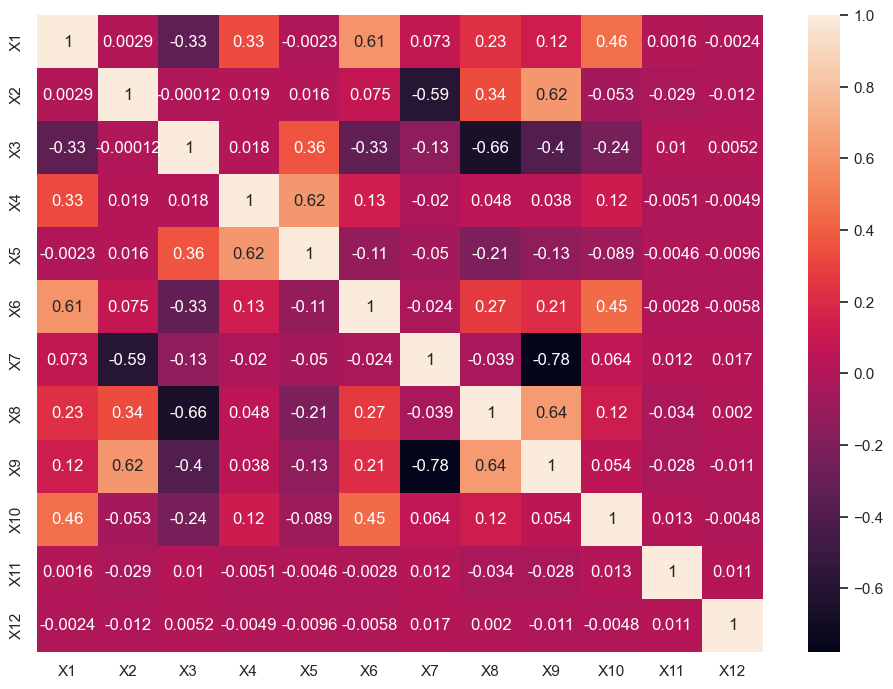

In [8]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), annot=True)

### From below we can see that Carrot and Orange have only values FC11 and FC14 in X13 and more correlation can be found so we expect X13 to be a good feature

In [9]:
CrosstabResult=pd.crosstab(index=df['X13'],columns=df['Y'])
print(CrosstabResult)

Y      Apple  Berry  Carrot  Mango  Melon  Orange  Peach
X13                                                     
 FC11    771      0       0      0    644     100    271
 FC12     24      0       0      0      0       0      0
 FC13    480    285       0    143    927       0     37
 FC14      0    965    1620    107      0       0      0


In [10]:
CrosstabResult=pd.crosstab(index=df['X14'],columns=df['Y'])
print(CrosstabResult)

Y      Apple  Berry  Carrot  Mango  Melon  Orange  Peach
X14                                                     
 CA21      0     91     101     37      0       0      0
 CA22      0    143      70      7     47       0      0
 CA23      0     59     607      0      0       0      0
 CA24      4    153      98      2     93       0      0
 CA25      0     34      25     30      0       0      0
 CA26      0    187     187      0      0       0      0
 CA30      1    509     125     38     47       0      0
 CA31      3     41      21      0    107       0      0
 CA32     22      0       0      0      0      21      0
 CA33      5      1       0     51    234       0      0
 CA34      0      2     100      0      0       0      0
 CA36      8      2      27      0      8       6      0
 CA37      2     25     259      0     88       0      0
 CA38      0      0       0      0     33      12      0
 CA39      8      0       0      0     15       0      0
 CA40     27      0       0    

In [11]:
CrosstabResult=pd.crosstab(index=df['X15'],columns=df['Y'])
print(CrosstabResult)

Y    Apple  Berry  Carrot  Mango  Melon  Orange  Peach
X15                                                   
R        0      0       1      0      0       0      0
R1      34     38      53      6     38       6     12
R2      39     44      37     12     55       6      9
R3      57     54      50     12     55       4      9


In [12]:
CrosstabResult=pd.crosstab(index=df['X13'],columns=df['X14'])
print(CrosstabResult)

X14     CA21   CA22   CA23   CA24   CA25   CA26   CA30   CA31   CA32   CA33  \
X13                                                                           
 FC11      0      0      0      0      0      0      0      0     43      0   
 FC12      0      0      0      0      0      0      0      0      0      0   
 FC13      0    129      0    219      0      0     94    140      0    291   
 FC14    229    138    666    131     89    374    626     32      0      0   

X14    ...   CA49   CA50   CA51   CA52   CA53   CA54   CA55   CA58   CA59  \
X13    ...                                                                  
 FC11  ...    586    436      0      0      0      0      1    125    108   
 FC12  ...      0      0      0      0      0      0      0      0      0   
 FC13  ...      0      0    132    224    163      5      0     20     35   
 FC14  ...      0      0      0      0      0      0      0      0      0   

X14     CA60  
X13           
 FC11     50  
 FC12      0  
 F

In [13]:
CrosstabResult=pd.crosstab(index=df['X13'],columns=df['X15'])
print(CrosstabResult)

X15    R  R1  R2  R3
X13                 
 FC11  0  49  70  73
 FC12  0   1   0   0
 FC13  0  56  57  70
 FC14  1  81  75  98


In [14]:
CrosstabResult=pd.crosstab(index=df['X14'],columns=df['X15'])
print(CrosstabResult)

X15    R  R1  R2  R3
X14                 
 CA21  0   5   6   8
 CA22  0  11   8  11
 CA23  0  18  23  13
 CA24  0  16  10  13
 CA25  0   3   1   5
 CA26  0  16   8  19
 CA30  0  18  23  30
 CA31  0   6   6   8
 CA32  0   2   0   1
 CA33  0   6   8  10
 CA34  0   4   2   4
 CA36  0   0   1   1
 CA37  1   8  12  12
 CA38  0   2   3   2
 CA39  0   0   0   1
 CA40  0   0   1   4
 CA42  0   4   3   6
 CA43  0  13   9  17
 CA44  0   2   4   3
 CA49  0  19  30  18
 CA50  0   8  17  17
 CA51  0   5   7   6
 CA52  0   4   6  12
 CA53  0   5   5   6
 CA58  0   6   3   4
 CA59  0   4   6   5
 CA60  0   2   0   5


## Dealing with missing values

### Since X15 has many more than 90% of its value as Nan we will drop it and for X2 we can fill it with the column mean since only less than 10% Nan

In [15]:
df.drop('X15', axis=1, inplace=True)

In [16]:
df['X2'] = df['X2'].fillna(df['X2'].mean())

In [17]:
df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
Y      0
dtype: int64

## One hot encoding

In [18]:
df = pd.get_dummies(
    data=df,
    columns=["X13", "X14"],
    prefix=["X13", "X14"])

df = df.reindex(sorted(df.columns), axis=1)

In [19]:
df

,X1,X10,X11,X12,X13_ FC11,X13_ FC12,X13_ FC13,X13_ FC14,X14_ CA21,X14_ CA22,...,X14_ CA60,X2,X3,X4,X5,X6,X7,X8,X9,Y
0,2709,2114,0.66,269,1,0,0,0,0,0,...,0,59.0,11,120,43,150,228,217,120,Melon
1,2802,162,0.35,195,1,0,0,0,0,0,...,0,54.0,7,0,0,693,224,225,136,Melon
2,2325,162,0.89,750,0,0,0,1,0,0,...,0,28.0,12,0,0,1260,215,213,133,Carrot
3,2837,6221,0.27,-155,1,0,0,0,0,0,...,0,112.0,8,272,16,3649,235,231,128,Orange
4,2509,5184,0.93,88,1,0,0,0,0,0,...,0,59.0,7,134,10,900,226,226,134,Melon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6369,3101,1657,0.50,437,1,0,0,0,0,0,...,0,67.0,6,170,1,824,227,228,135,Apple
6370,3050,5770,0.74,53,1,0,0,0,0,0,...,0,139.0,13,30,-3,3127,240,235,123,Apple
6371,2080,108,0.88,-79,0,0,0,1,0,0,...,0,106.0,24,30,12,582,252,202,64,Carrot
6372,3011,6632,0.67,-299,1,0,0,0,0,0,...,0,108.0,10,212,36,2912,237,229,122,Apple


## Resolving imbalanced data

In [20]:
# create X_data, y_data
X_data = df.iloc[:,:-1].values
y_data = df.iloc[:,-1].values

In [21]:
# split into train-val-test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7, random_state=777, stratify=y_data)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=777, stratify=y_test)

In [22]:
np.unique(y_data, return_counts=True)

(array(['Apple', 'Berry', 'Carrot', 'Mango', 'Melon', 'Orange', 'Peach'],
       dtype=object),
 array([1275, 1250, 1620,  250, 1571,  100,  308], dtype=int64))

In [23]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print('X_train= {}, X_val= {}, X_test= {}'.format(X_train.shape, X_val.shape, X_test.shape))

print()
print('class % in y_train = {}'.format((np.unique(y_train, return_counts=True)[1]/y_train.shape[0]).round(2)))

X_train= (7938, 48), X_val= (957, 48), X_test= (956, 48)

class % in y_train = [0.14 0.14 0.14 0.14 0.14 0.14 0.14]


In [24]:
print('X_data={}'.format(X_data.shape))
print('X_train={}, X_val={}, X_test={}'.format(X_train.shape, X_val.shape, X_test.shape))
print('y_train={}, y_val={}, y_test={}'.format(y_train.shape, y_val.shape, y_test.shape))
print()
print('class % in y_train = {}'.format((np.unique(y_train, return_counts=True)[1]/y_train.shape[0]).round(2)))
print('class % in y_val = {}'.format((np.unique(y_val, return_counts=True)[1]/y_val.shape[0]).round(2)))
print('class % in y_test = {}'.format((np.unique(y_test, return_counts=True)[1]/y_test.shape[0]).round(2)))

X_data=(6374, 48)
X_train=(7938, 48), X_val=(957, 48), X_test=(956, 48)
y_train=(7938,), y_val=(957,), y_test=(956,)

class % in y_train = [0.14 0.14 0.14 0.14 0.14 0.14 0.14]
class % in y_val = [0.2  0.2  0.25 0.04 0.25 0.02 0.05]
class % in y_test = [0.2  0.2  0.25 0.04 0.25 0.02 0.05]


In [25]:
np.unique(y_train, return_counts=True)

(array(['Apple', 'Berry', 'Carrot', 'Mango', 'Melon', 'Orange', 'Peach'],
       dtype=object),
 array([1134, 1134, 1134, 1134, 1134, 1134, 1134], dtype=int64))

## Feature engineering

In [26]:
# standard-scale using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Appropriate measures

In [27]:
from sklearn.metrics import f1_score, make_scorer, classification_report, confusion_matrix, accuracy_score

f1 = make_scorer(f1_score, average='macro')

# Training classifiers

### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = { 'p': [1,2],  
    "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors':[1, 2, 3, 4, 5, 6, 8, 9, 10,15,20,25],  }

In [29]:
grid_search_KNN= GridSearchCV(sklearn.neighbors.KNeighborsClassifier(), param_grid, verbose = 1, n_jobs=-1, scoring=f1)   

grid_search_KNN.fit(X_train, y_train)  

print(grid_search_KNN.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}


In [30]:
y_pred_on_val = grid_search_KNN.predict(X_val)
print("The training acccuracy is: %.3f" % grid_search_KNN.best_score_)
print("The validation acccuracy is: %.3f" % sklearn.metrics.accuracy_score(y_val, y_pred_on_val))
print("The f1 score is: %.3f" % f1_score(y_val, y_pred_on_val, average='macro'))

The validation acccuracy is: 0.840
The f1 score is: 0.791


### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

param_grid_TREE = { 'max_features': ['sqrt', 'log2'],
                    'criterion': ['gini', 'entropy'],  
                    'splitter':['best', 'random'],
                    'max_depth':[1, 2, 3, 4, 5, 6, 8, 9, 10, 15, 20,  30, 50, 80, 100, 130]}

grid_search_dTree=GridSearchCV(DecisionTreeClassifier(), param_grid_TREE, verbose = 1, n_jobs=-1, scoring=f1)   

grid_search_dTree = grid_search_dTree.fit(X_train,y_train)

print(grid_search_dTree.best_params_) 

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt', 'splitter': 'best'}


In [33]:
y_pred_on_val = grid_search_dTree.predict(X_val)
print("The training acccuracy is: %.3f" % grid_search_dTree.best_score_)
print("The validation acccuracy is: %.3f" % sklearn.metrics.accuracy_score(y_val, y_pred_on_val))
print("The f1 score is: %.3f" % f1_score(y_val, y_pred_on_val, average='macro'))

The validation acccuracy is: 0.790
The f1 score is: 0.706


**This shows the features importance for this model**

In [124]:
dTree_best = grid_search_dTree.best_estimator_
imp_df = pd.DataFrame({
    "Varname": df.columns.drop('Y'),
    "Imp": dTree_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False).T

,0,6,30,44,1,47,38,42,41,43,...,28,5,35,12,16,18,19,36,29,24
Varname,X1,X13_ FC13,X14_ CA49,X6,X10,X9,X14_ CA59,X4,X3,X5,...,X14_ CA46,X13_ FC12,X14_ CA54,X14_ CA25,X14_ CA32,X14_ CA34,X14_ CA36,X14_ CA55,X14_ CA48,X14_ CA41
Imp,0.307462,0.083246,0.066406,0.062739,0.062116,0.047398,0.046127,0.045303,0.041383,0.030425,...,0.00034,0.000275,0.000183,0.000157,0.00009,0.00005,0.000011,0.0,0.0,0.0


### Neural Network

In [35]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto', sparse_output=False)
y_train_OneHotEncoded = ohe.fit_transform(y_train[:, np.newaxis])
y_val_OneHotEncoded = ohe.fit_transform(y_val[:, np.newaxis])

In [36]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(48,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train_OneHotEncoded,epochs=25, batch_size=32, verbose=1)

Epoch 1/25
249/249 [==============================] - 2s 3ms/step - loss: 1.3363 - accuracy: 0.5209
Epoch 2/25
249/249 [==============================] - 1s 3ms/step - loss: 0.6056 - accuracy: 0.7824
Epoch 3/25
249/249 [==============================] - 1s 3ms/step - loss: 0.4404 - accuracy: 0.8410
Epoch 4/25
249/249 [==============================] - 1s 3ms/step - loss: 0.3704 - accuracy: 0.8673
Epoch 5/25
249/249 [==============================] - 1s 3ms/step - loss: 0.3307 - accuracy: 0.8796
Epoch 6/25
249/249 [==============================] - 1s 3ms/step - loss: 0.3015 - accuracy: 0.8951
Epoch 7/25
249/249 [==============================] - 1s 3ms/step - loss: 0.2790 - accuracy: 0.9007
Epoch 8/25
249/249 [==============================] - 1s 3ms/step - loss: 0.2629 - accuracy: 0.9088
Epoch 9/25
249/249 [==============================] - 1s 3ms/step - loss: 0.2477 - accuracy: 0.9122
Epoch 10/25
249/249 [==============================] - 1s 3ms/step - loss: 0.2352 - accuracy: 0.9172

In [38]:
score = model.evaluate(X_val, y_val_OneHotEncoded, verbose=1)

30/30 [==============================] - 0s 3ms/step - loss: 0.3581 - accuracy: 0.8746


### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'n_estimators': [2, 5, 10, 20, 30, 50, 100, 200]
}

grid_search_RF = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params, n_jobs=-1, verbose=1, scoring=f1)

grid_search_RF.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [2, 5, 10, 20, 30, 50, 100, 200]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [46]:
y_pred_on_val = grid_search_RF.predict(X_val)
print("The training acccuracy is: %.3f" % grid_search_RF.best_score_)
print("The validation acccuracy is: %.3f" % sklearn.metrics.accuracy_score(y_val, y_pred_on_val))
print("The f1 score is: %.3f" % f1_score(y_val, y_pred_on_val, average='macro'))

The validation acccuracy is: 0.889
The f1 score is: 0.837


In [126]:
rf_best = grid_search_RF.best_estimator_
imp_df = pd.DataFrame({
    "Varname": df.columns.drop('Y'),
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False).T

,0,1,44,7,45,4,42,46,43,6,...,32,19,35,5,18,28,22,24,36,29
Varname,X1,X10,X6,X13_ FC14,X7,X13_ FC11,X4,X8,X5,X13_ FC13,...,X14_ CA51,X14_ CA36,X14_ CA54,X13_ FC12,X14_ CA34,X14_ CA46,X14_ CA39,X14_ CA41,X14_ CA55,X14_ CA48
Imp,0.201471,0.112119,0.091448,0.065627,0.052685,0.047814,0.039006,0.034969,0.031898,0.030582,...,0.000933,0.000919,0.000471,0.000416,0.000278,0.00009,0.000012,0.0,0.0,0.0


### Bagging

In [61]:
from sklearn.ensemble import BaggingClassifier

params = {'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20, 30, 50, 100]
         }

grid_search_bagging = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_grid=params, n_jobs=-1, verbose=1, scoring=f1)

grid_search_bagging.fit(X_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [2, 5, 10, 20, 30, 50, 100]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [105]:
y_pred_on_val = grid_search_bagging.predict(X_val)
print("The training acccuracy is: %.3f" % grid_search_bagging.best_score_)
print("The validation acccuracy is: %.3f" % sklearn.metrics.accuracy_score(y_val, y_pred_on_val))
print("The f1 score is: %.3f" % f1_score(y_val, y_pred_on_val, average='macro'))

The training acccuracy is: 0.961
The validation acccuracy is: 0.917
The f1 score is: 0.877


### AdaBoost

In [69]:
from sklearn.ensemble import AdaBoostClassifier
parameters = {'n_estimators':[2, 5, 10, 20, 30, 50, 100, 200],
              'learning_rate':[0.0001, .001, 0.01, .1, 1]}

grid_search_ADA = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier()), parameters, verbose=1, n_jobs=-1, scoring=f1)
grid_search_ADA.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'n_estimators': [2, 5, 10, 20, 30, 50, 100, 200]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [77]:
y_pred_on_val = grid_search_ADA.predict(X_val)
print("The training acccuracy is: %.3f" % grid_search_ADA.best_score_)
print("The validation acccuracy is: %.3f" % sklearn.metrics.accuracy_score(y_val, y_pred_on_val))
print("The f1 score is: %.3f" % f1_score(y_val, y_pred_on_val, average='macro'))

The training acccuracy is: 0.924
The validation acccuracy is: 0.893
The f1 score is: 0.847


In [127]:
ADA_best = grid_search_ADA.best_estimator_
imp_df = pd.DataFrame({
    "Varname": df.columns.drop('Y'),
    "Imp": ADA_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False).T

,0,1,44,42,45,10,34,43,46,40,...,19,29,35,28,36,21,18,5,12,24
Varname,X1,X10,X6,X4,X7,X14_ CA23,X14_ CA53,X5,X8,X2,...,X14_ CA36,X14_ CA48,X14_ CA54,X14_ CA46,X14_ CA55,X14_ CA38,X14_ CA34,X13_ FC12,X14_ CA25,X14_ CA41
Imp,0.35922,0.193784,0.075579,0.054503,0.043363,0.043287,0.032643,0.028488,0.027445,0.016356,...,0.00047,0.000282,0.000273,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### SVC

**rbf kernel is not included because of the slower performance when tuned with grid search**

In [98]:
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['linear', 'poly'],
              'degree': range(1,3)
             } 
  
grid_search_SVC = GridSearchCV(SVC(), param_grid, verbose = 1, cv = 3)
  
grid_search_SVC.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': range(1, 3),
                         'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'poly']},
             verbose=1)

In [103]:
print(grid_search_SVC.best_params_)

{'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}


In [104]:
y_pred_on_val = grid_search_SVC.predict(X_val)
print("The training acccuracy is: %.3f" % grid_search_SVC.best_score_)
print("The validation acccuracy is: %.3f" % sklearn.metrics.accuracy_score(y_val, y_pred_on_val))
print("The f1 score is: %.3f" % f1_score(y_val, y_pred_on_val, average='macro'))

The training acccuracy is: 0.934
The validation acccuracy is: 0.884
The f1 score is: 0.824


In [141]:
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01]
             } 
  
grid_search_SVC_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid, verbose = 3, cv = 3)
  
grid_search_SVC_rbf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .....................................C=0.1, gamma=1; total time=   8.8s
[CV] END .....................................C=0.1, gamma=1; total time=   8.9s
[CV] END .....................................C=0.1, gamma=1; total time=   8.9s
[CV] END ...................................C=0.1, gamma=0.1; total time=   5.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=   5.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=   5.6s
[CV] END ..................................C=0.1, gamma=0.01; total time=   4.5s
[CV] END ..................................C=0.1, gamma=0.01; total time=   4.6s
[CV] END ..................................C=0.1, gamma=0.01; total time=   4.8s
[CV] END .......................................C=1, gamma=1; total time=   9.4s
[CV] END .......................................C=1, gamma=1; total time=   9.3s
[CV] END .......................................C

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
             verbose=2)

In [143]:
print(grid_search_SVC_rbf.best_params_)

{'C': 10, 'gamma': 0.1}


In [144]:
y_pred_on_val = grid_search_SVC_rbf.predict(X_val)
print("The training acccuracy is: %.3f" % grid_search_SVC_rbf.best_score_)
print("The validation acccuracy is: %.3f" % sklearn.metrics.accuracy_score(y_val, y_pred_on_val))
print("The f1 score is: %.3f" % f1_score(y_val, y_pred_on_val, average='macro'))

The training acccuracy is: 0.936
The validation acccuracy is: 0.881
The f1 score is: 0.835


# Final results on test set

In [131]:
# evaluate the best model on X_test, y_test

# merge train and val data
X_train_val_merge = np.vstack([X_train, X_val]) 
y_train_val_merge = np.concatenate((y_train, y_val))

model = grid_search_bagging.best_estimator_.fit(X_train_val_merge, y_train_val_merge)

In [132]:
y_pred_on_test = model.predict(X_test)

In [133]:
print(sklearn.metrics.classification_report(y_test, y_pred_on_test, target_names=df['Y'].unique()))

              precision    recall  f1-score   support

       Melon       0.93      0.92      0.92       191
      Carrot       0.94      0.89      0.92       187
      Orange       0.94      0.97      0.96       243
       Apple       0.80      0.84      0.82        38
       Berry       0.95      0.96      0.95       236
       Mango       0.71      0.80      0.75        15
       Peach       0.89      0.85      0.87        46

    accuracy                           0.93       956
   macro avg       0.88      0.89      0.88       956
weighted avg       0.93      0.93      0.93       956



In [134]:
sklearn.metrics.confusion_matrix(y_test, y_pred_on_test)

array([[176,   0,   0,   0,   8,   2,   5],
       [  2, 167,  13,   1,   4,   0,   0],
       [  0,   3, 236,   4,   0,   0,   0],
       [  0,   5,   1,  32,   0,   0,   0],
       [  2,   2,   0,   3, 226,   3,   0],
       [  3,   0,   0,   0,   0,  12,   0],
       [  7,   0,   0,   0,   0,   0,  39]], dtype=int64)

## From the confusion matrix we can see that mango seems to be performing worse but it could be due to having a small sample of mango in the test set

In [140]:
y_pred = model.predict(X_train_val_merge)
print("The training acccuracy is: %.3f" % sklearn.metrics.accuracy_score(y_train_val_merge, y_pred))
print("The training f1 score is: %.3f" % f1_score(y_train_val_merge, y_pred, average='macro'))

The training acccuracy is: 1.000
The f1 score is: 1.000


In [145]:
print(sklearn.metrics.classification_report(y_train_val_merge, y_pred, target_names=df['Y'].unique()))

              precision    recall  f1-score   support

       Melon       1.00      1.00      1.00      1326
      Carrot       1.00      1.00      1.00      1322
      Orange       1.00      1.00      1.00      1377
       Apple       1.00      1.00      1.00      1171
       Berry       1.00      1.00      1.00      1370
       Mango       1.00      1.00      1.00      1149
       Peach       1.00      1.00      1.00      1180

    accuracy                           1.00      8895
   macro avg       1.00      1.00      1.00      8895
weighted avg       1.00      1.00      1.00      8895

